# Clustering Segun K-Means - Mamals

## Carga de librerías y datos.

In [ ]:
#Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import seaborn as sns
!pip install funpymodeling
from funpymodeling.exploratory import status, freq_tbl, profiling_num
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

In [ ]:
#Importamos y creamos DF
files.upload() 
df= pd.read_csv('mamals.csv')
df.head()

Saving mamals.csv to mamals.csv


,Unnamed: 0,name,water,protein,fat,lactose,ash
0,1,Horse,90.1,2.6,1.0,6.9,0.35
1,2,Orangutan,88.5,1.4,3.5,6.0,0.24
2,3,Monkey,88.4,2.2,2.7,6.4,0.18
3,4,Donkey,90.3,1.7,1.4,6.2,0.40
4,5,Hippo,90.4,0.6,4.5,4.4,0.10


In [ ]:
df.describe()

,Unnamed: 0,water,protein,fat,lactose,ash
count,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,78.184000,6.212000,10.308000,4.13200,0.829200
std,7.359801,12.817913,3.652547,10.517997,1.83183,0.473787
min,1.000000,44.900000,0.600000,1.000000,0.00000,0.100000
25%,7.000000,71.300000,3.000000,3.400000,2.70000,0.530000
50%,13.000000,82.000000,5.900000,6.300000,4.70000,0.800000
75%,19.000000,87.700000,9.700000,13.100000,5.60000,0.930000
max,25.000000,90.400000,12.300000,42.000000,6.90000,2.300000


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1) #dropeamos la primer columna ya que al exportar interpretó los índicies como una nueva columna

In [ ]:
df.info()
#son todos datos numericos menos la variable 'name'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  25 non-null     int64  
 1   name        25 non-null     object 
 2   water       25 non-null     float64
 3   protein     25 non-null     float64
 4   fat         25 non-null     float64
 5   lactose     25 non-null     float64
 6   ash         25 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.5+ KB


In [ ]:
df.name.value_counts() #diferentes valores que toma la variable 'name'

Dog           1
Camel         1
Orangutan     1
Mule          1
Sheep         1
Whale         1
Rat           1
Elephant      1
Reindeer      1
Hippo         1
Monkey        1
Dolphin       1
Pig           1
Bison         1
Buffalo       1
Donkey        1
Guinea Pig    1
Horse         1
Zebra         1
Fox           1
Cat           1
Deer          1
Rabbit        1
Seal          1
Llama         1
Name: name, dtype: int64

Text(0.5, 1.0, 'Ash')

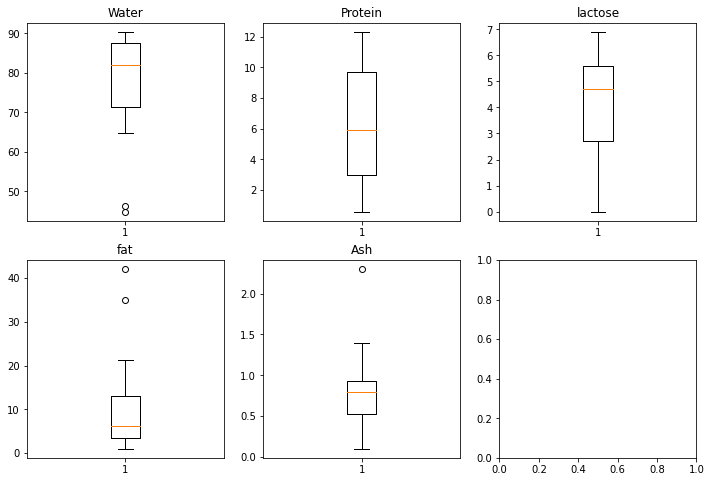

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0,0].boxplot(df.water)
axs[0,0].set_title('Water')

axs[0,1].boxplot(df.protein)
axs[0,1].set_title('Protein')

axs[0,2].boxplot(df.lactose)
axs[0,2].set_title('lactose')

axs[1,0].boxplot(df.fat)
axs[1,0].set_title('fat')

axs[1,1].boxplot(df.ash)
axs[1,1].set_title('Ash')

## Estandarización

In [ ]:
# Estandarización de varaibles
# Creamos una función que lo haga, que itere con cada registro y lo convierta
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0) # restamos la media y dividimos por desvio std

df_mean_norm = mean_norm(df.drop(['name'], axis=1)) # creamos un nuevo datast con las variables estandarizadas
print(df_mean_norm)

       water   protein       fat   lactose       ash
0   0.929636 -0.988899 -0.884959  1.511058 -1.011424
1   0.804811 -1.317437 -0.647272  1.019745 -1.243596
2   0.797010 -1.098412 -0.723332  1.238106 -1.370235
3   0.945240 -1.235302 -0.846929  1.128926 -0.905892
4   0.953041 -1.536462 -0.552196  0.146302 -1.539088
5   0.742399 -0.742496 -0.656779  0.364663 -0.251590
6   0.679986 -0.386580 -0.818407  0.855975  0.149434
7   0.305510 -0.085420 -0.228941  0.310072 -0.103844
8   0.289907  0.325252 -0.295494 -0.781732  0.043902
9   0.266502  1.064463 -0.381061  0.146302 -0.167164
10  0.266502  0.106227 -0.419091  0.419253  0.212754
11  0.648780 -0.632983 -0.675794  0.801385 -0.061631
12  0.921835 -1.153168 -0.808899  0.746794 -0.758146
13  0.360121  0.243118 -0.495151 -0.235830  0.571565
14  0.625375 -0.879386 -0.523674  0.637614 -0.272696
15  0.297708 -0.167554 -0.371554  0.310072  0.170541
16 -0.146982  0.845437 -0.076821 -0.617961  0.782630
17 -0.583870 -0.715117  0.693288  0.801385 -0.

In [ ]:
df_mean_norm.describe()

,water,protein,fat,lactose,ash
count,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,-8.881784e-16,7.993606e-17,7.105427e-17,3.197442e-16,-1.687539e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.596679e+00,-1.536462e+00,-8.849593e-01,-2.255668e+00,-1.539088e+00
25%,-5.370609e-01,-8.793863e-01,-6.567790e-01,-7.817321e-01,-6.315071e-01
50%,2.977084e-01,-8.541984e-02,-3.810611e-01,3.100725e-01,-6.163104e-02
75%,7.423985e-01,9.549501e-01,2.654498e-01,8.013845e-01,2.127537e-01
max,9.530412e-01,1.666782e+00,3.013121e+00,1.511058e+00,3.104347e+00


Podriamos eliminar outliers y trabajar con el rango intercuartil, pero no son signficativos lso cambios como para proceder a realizrlo.
Los rangos son muy estrechos y en total podriamos descartar únicamente dos registros, algo que no afecta a la performance operativa del modelo.

### Gráficos después de estandarizar

Text(0.5, 1.0, 'Ash')

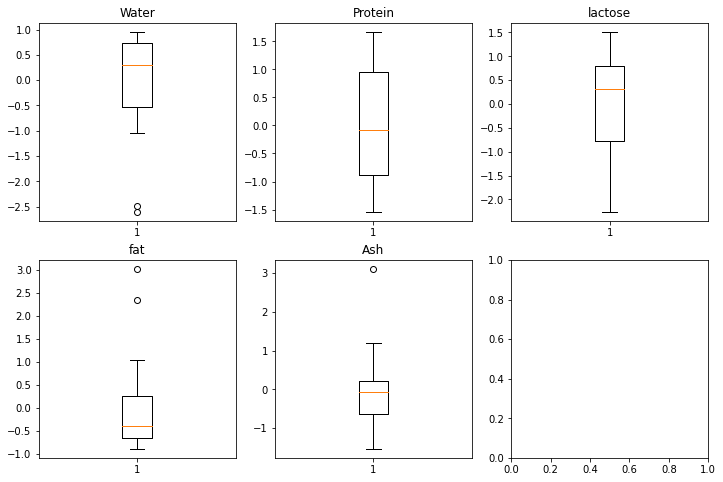

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0,0].boxplot(df_mean_norm.water)
axs[0,0].set_title('Water')

axs[0,1].boxplot(df_mean_norm.protein)
axs[0,1].set_title('Protein')

axs[0,2].boxplot(df_mean_norm.lactose)
axs[0,2].set_title('lactose')

axs[1,0].boxplot(df_mean_norm.fat)
axs[1,0].set_title('fat')

axs[1,1].boxplot(df_mean_norm.ash)
axs[1,1].set_title('Ash')

Text(0.5, 1.0, 'Ash')

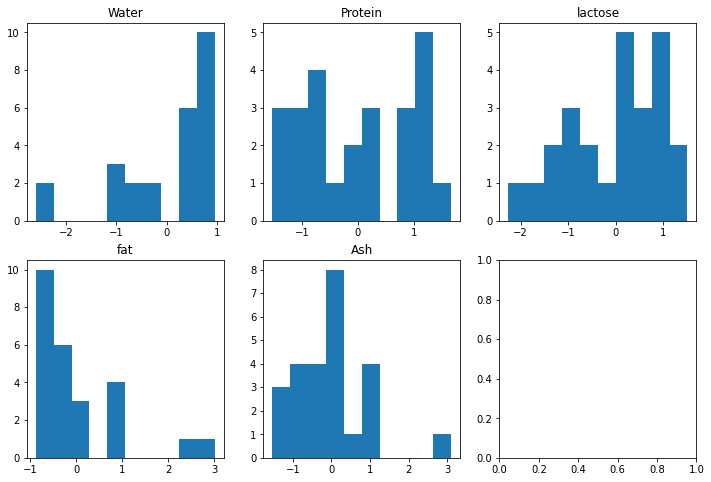

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0,0].hist(df_mean_norm.water)
axs[0,0].set_title('Water')

axs[0,1].hist(df_mean_norm.protein)
axs[0,1].set_title('Protein')

axs[0,2].hist(df_mean_norm.lactose)
axs[0,2].set_title('lactose')

axs[1,0].hist(df_mean_norm.fat)
axs[1,0].set_title('fat')

axs[1,1].hist(df_mean_norm.ash)
axs[1,1].set_title('Ash')

In [ ]:
profiling_num(df_mean_norm) #igual a describe pero de otra librería

,variable,mean,std_dev,variation_coef,p_0.01,p_0.05,p_0.25,p_0.5,p_0.75,p_0.95,p_0.99
0,water,-8.881784e-16,1.0,-1.125900e+15,-2.568593,-2.192557,-0.537061,0.297708,0.742399,0.942119,0.951169
1,protein,7.993606e-17,1.0,1.251000e+16,-1.483896,-1.301010,-0.879386,-0.085420,0.954950,1.316342,1.587933
2,fat,7.105427e-17,1.0,1.407375e+16,-0.875832,-0.841225,-0.656779,-0.381061,0.265450,2.077582,2.851113
3,lactose,3.197442e-16,1.0,3.127500e+15,-2.137753,-1.687930,-0.781732,0.310072,0.801385,1.216270,1.445549
4,ash,-1.687539e-16,1.0,-5.925789e+15,-1.498563,-1.344908,-0.631507,-0.061631,0.212754,1.204760,2.648446


##Modelo

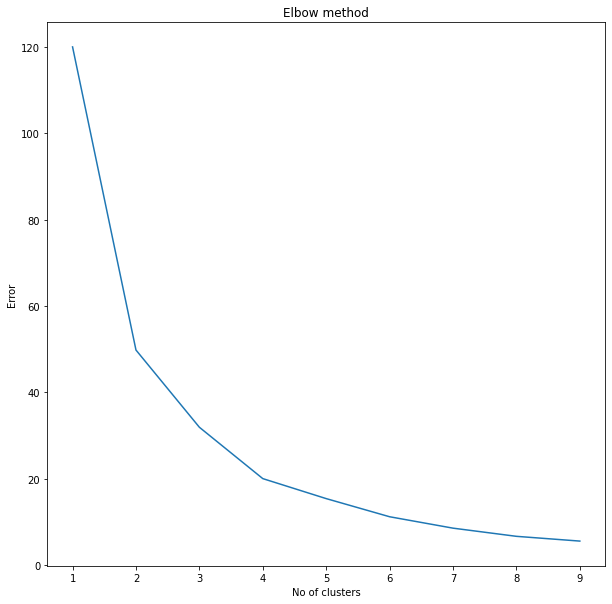

In [ ]:
# Vamos a hacer el grafico para aplicar el criterio del codo
# Se crea el vector Error
Error =[]

#hago un loop de 1 a 10 para crear los clusters para el gráfico
for i in range(1, 10):

#instacio kmeans con el k correspondiente al loop actual  y lo aplico a df_mean_norm
    kmeans = KMeans(n_clusters = i).fit(df_mean_norm)
    kmeans.fit(df_mean_norm)

#calculo el error para la iteracion y lo agrego al vector Error
    Error.append(kmeans.inertia_)
    #inertia: es la suma cuadrada de las distancias de las uestras respecto de su centroide

#al final quedo un vector con el error, el cual graficamos (noten estamos ya fuera de la  indentacion)

fig, axs = plt.subplots(figsize=(10,10))
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()


In [ ]:
#con 2 clusters hace el quiebre pero nos da más y mejor ganancia con k=4
#para poder explicar el problema de clasificación que deseamos

kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(df_mean_norm)

clus4 = kmeans4.predict(df_mean_norm)

print(clus4)

[0 0 0 0 0 2 2 2 2 2 2 2 0 2 2 2 1 2 1 1 1 1 1 3 3]


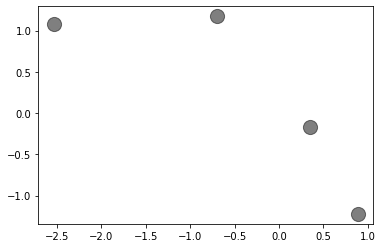

In [ ]:
#grafico los centroides de los 4 clusters
centers4 = kmeans4.cluster_centers_
plt.scatter(centers4[:, 0], centers4[:, 1], c='black', s=200, alpha=0.5);

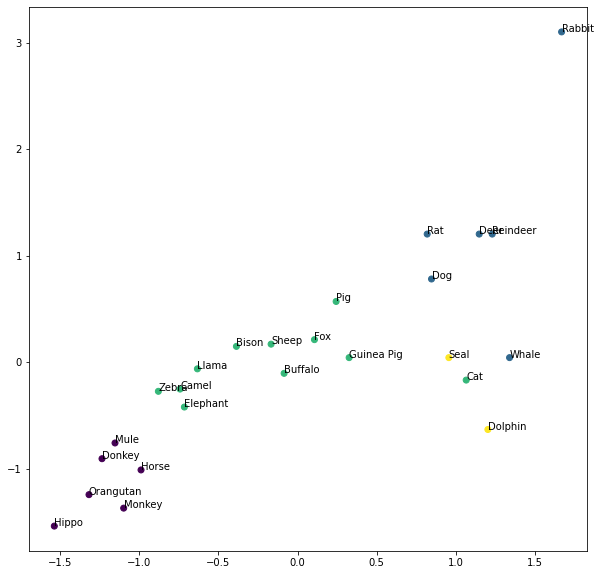

In [ ]:
#armo un array (mas una matriz que un array) 

df_array=df_mean_norm.values

x = df_array[:,1]
y = df_array[:,4]

plt.subplots(figsize= (10,10))
#hace un scatterplot de x e y
#c es color y s es una muestra de puntos porque son casi 4000 quedaria 
plt.scatter(x,y,c=clus4,cmap='viridis')
#en este caso para graficar en 2d usamos la olumna en posición 1 y posicion 4

names1=df.name.values #creamos un array con los nombres de los animales 

for i, label in enumerate(names1):
    plt.text(x[i],y[i], label)

plt.show()

In [ ]:
df_array[:,1]

array([-0.98889896, -1.31743683, -1.09841158, -1.23530236, -1.53646207,
       -0.74249557, -0.38657955, -0.08541984,  0.32525248,  1.06446267,
        0.10622724, -0.63298295, -1.15316789,  0.24311802, -0.87938634,
       -0.16755431,  0.84543743, -0.71511741,  1.66678209,  0.81805928,
        1.14659714,  1.2287316 ,  1.33824422,  0.95495005,  1.20135345])

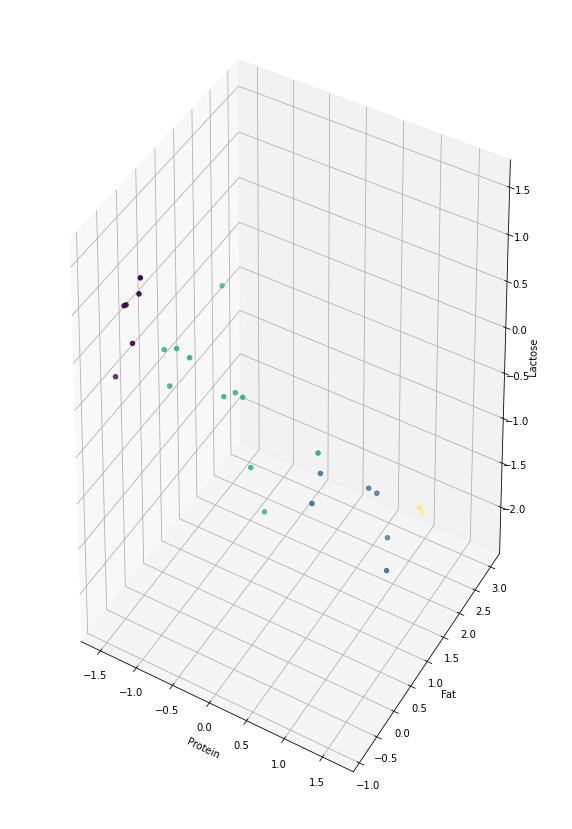

In [ ]:
#libreria para graficos 3D
from mpl_toolkits.mplot3d import Axes3D

#arma la figura y le da un tamaño y tipo
fig = plt.figure(figsize=(10,15))
ax = fig.add_subplot(111, projection='3d')

#ponemos etiqueta a las variables
ax.set_xlabel('Protein')
ax.set_ylabel('Fat')
ax.set_zlabel('Lactose')

#graficamos!
ax.scatter(df_array[:,1],df_array[:,2],df_array[:,3],c=clus4, marker='o')

Queda un poco mejor vista la división en 4 clústeres desde esta perspectiva y para las dimensiones graficadas.

##Silhoutte

In [ ]:
#Otra forma de estandrizar los datos es la funcion SCALE de Sklearn
df_scaled = scale(df.drop(['name'], axis=1)) #hace lo mismo resta la media y divide por el desvío estándar
df_scaled

In [ ]:
# Método silhouette para identificar el número óptimo de clusters

range_n_clusters = range(2, 12) #creamos un rango de 2 a 12
valores_medios_silhouette = [] #creamos una varaible vacía


In [ ]:
for n_clusters in range_n_clusters: #para los n clústeres dentro del rango
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, #le indicamos que itere con el número de clústeres definidos en el rango de 1 a 7 
                        n_init       = 20 #número de veces que el algoritmo será corrido con diferentes centroides semilla
                    )
    cluster_labels = modelo_kmeans.fit_predict(df_scaled) #esta función devuelve el indice del cluster al que pertenece cada registro
    silhouette_avg = silhouette_score(df_scaled, cluster_labels) #se calcula usando la media intracluster y la edia respecto al centroide de otro grupo más cercano
    valores_medios_silhouette.append(silhouette_avg)

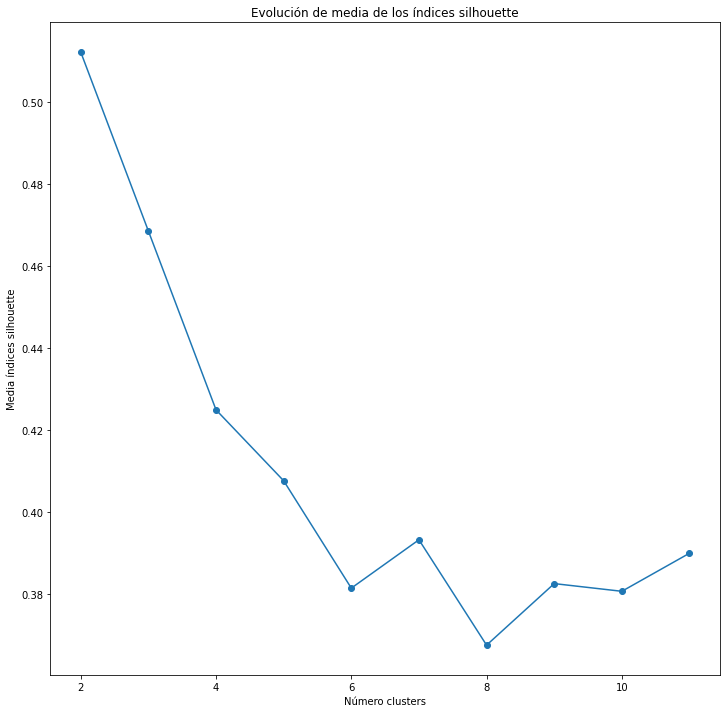

In [ ]:
 fig, ax = plt.subplots(1, 1, figsize=(12, 12))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o') #ploteamos el rango de 2 a 12, los valores silhouette
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

Coincide bastante con el metodo del codo.
Con k=4 llegamos a una varianza de 0.42, considerada alta.
Se podría seguir modifcando datos e hiperparámetros para que mejore el score. Ya sea a través de la creación de variables nuevas o eliminación de variables altamente correlacionadas que no aporten información a la hora de explicar la la clasificación de los datos a través del modelo.